In [30]:
# To remove useless future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Se carga el archivo y se separa en entrenamiento y prueba

In [31]:
from sklearn.model_selection import train_test_split
dataALL=pd.read_csv('datasets/TEPdata2.csv')  
N=len(dataALL)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(dataALL, train_size=cTrain, test_size=cTest)

136 108 28


In [32]:
train_data.shape

(108, 29)

In [33]:
train_data.head()

,Genero,Edad,Bebedor,Tabaquismo,OtraEnfermedad,ProcedimientoQuirurgicos,inmovilidad,Viaje,TEPPrevio,Maliginidad,...,PresionSistolica,PresionDiastolica,T38,Crepitos,Sibilancias,PresenciaSoplos,WBC,HB,PLT,TEP
11,0,66,0,0,1,0,0,0,0,0,...,110,80,1,0,0,0,9170,12.9,304,1
68,1,27,0,0,0,0,0,0,0,0,...,117,87,0,0,0,0,11520,14.4,245,1
129,1,85,0,1,1,0,0,0,0,0,...,180,110,0,0,0,1,9590,12.9,180,0
76,0,21,0,0,1,0,0,0,0,0,...,82,49,0,0,0,0,11010,14.1,243,1
84,0,68,0,1,1,0,0,0,0,0,...,118,72,0,0,0,0,9810,16.2,240,0


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 11 to 102
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Genero                    108 non-null    int64  
 1   Edad                      108 non-null    int64  
 2   Bebedor                   108 non-null    int64  
 3   Tabaquismo                108 non-null    int64  
 4   OtraEnfermedad            108 non-null    int64  
 5   ProcedimientoQuirurgicos  108 non-null    int64  
 6   inmovilidad               108 non-null    int64  
 7   Viaje                     108 non-null    int64  
 8   TEPPrevio                 108 non-null    int64  
 9   Maliginidad               108 non-null    int64  
 10  Disnea                    108 non-null    int64  
 11  DolorToracico             108 non-null    int64  
 12  Tos                       108 non-null    int64  
 13  Hemoptisis                108 non-null    int64  
 14  SintomasD

In [35]:
train_data[["Genero", "Edad", "Bebedor", "Tabaquismo","ProcedimientoQuirurgicos","inmovilidad","SO2","PLT","TEP"]].describe()

,Genero,Edad,Bebedor,Tabaquismo,ProcedimientoQuirurgicos,inmovilidad,SO2,PLT,TEP
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.509259,50.370370,0.046296,0.194444,0.055556,0.055556,89.673148,245.981481,0.759259
std,0.502245,18.797292,0.211106,0.397618,0.230129,0.230129,13.922936,47.214955,0.429526
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,90.000000,226.500000,1.000000
50%,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,92.000000,244.500000,1.000000
75%,1.000000,66.000000,0.000000,0.000000,0.000000,0.000000,95.000000,266.250000,1.000000
max,1.000000,86.000000,1.000000,1.000000,1.000000,1.000000,100.000000,400.000000,1.000000


### Pipeline para los atributos numéricos

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_attribs = ["Genero", "Edad", "Bebedor","Tabaquismo","OtraEnfermedad","ProcedimientoQuirurgicos","inmovilidad","Viaje","TEPPrevio","Maliginidad","Disnea","DolorToracico","Tos","Hemoptisis","SintomasDisautomicos","SX","FrecuenciaRespiratoria","SO2","FrecuenciaCardiaca","PresionSistolica","PresionDiastolica","T38","Crepitos","Sibilancias","PresenciaSoplos","WBC","HB","PLT"]

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])

#num_pipeline = Pipeline([
#        ("imputer", SimpleImputer(strategy="median"))   
#    ])

#MinMaxScaler() escala entre 0 y 1, pero dio peores resultados con svm
#StandardScaler()

### Pipeline completo

In [37]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

### Extraemos las etiquetas de clase

In [38]:
y_train = train_data["TEP"]
y_train

11     1
68     1
129    0
76     1
84     0
      ..
71     1
106    0
14     1
92     1
102    0
Name: TEP, Length: 108, dtype: int64

In [39]:
X_train = full_pipeline.fit_transform(train_data)

In [40]:
X_train.shape

(108, 28)

In [41]:
fila28 = train_data["PLT"]
fila28

11     304
68     245
129    180
76     243
84     240
      ... 
71     245
106    215
14     304
92     235
102    227
Name: PLT, Length: 108, dtype: int64

In [42]:
X_train

array([[-1.01869321e+00,  8.35359455e-01, -2.20326325e-01, ...,
        -1.09524790e-03, -2.10874336e-01,  1.23454533e+00],
       [ 9.81649817e-01, -1.24908013e+00, -2.20326325e-01, ...,
         8.95594807e-01,  9.87779784e-01, -2.08844247e-02],
       [ 9.81649817e-01,  1.85085566e+00, -2.20326325e-01, ...,
         1.59164251e-01, -2.10874336e-01, -1.40398501e+00],
       ...,
       [-1.01869321e+00,  6.75017948e-01, -2.20326325e-01, ...,
        -1.11750616e-01, -2.90784610e-01,  1.23454533e+00],
       [ 9.81649817e-01,  1.90430283e+00, -2.20326325e-01, ...,
         2.50741108e-01,  5.88228410e-01, -2.33669130e-01],
       [ 9.81649817e-01,  3.00887766e-01, -2.20326325e-01, ...,
         2.79581458e+00,  9.87779784e-01, -4.03896894e-01]])

In [43]:
X_train[0,:]

array([-1.01869321e+00,  8.35359455e-01, -2.20326325e-01, -4.91303684e-01,
        1.01869321e+00, -2.42535625e-01, -2.42535625e-01, -2.20326325e-01,
       -2.63262095e-01, -4.32218911e-01,  6.92424765e-01, -9.63624112e-01,
        2.39791576e+00, -2.82842712e-01, -6.34505636e-01, -4.01609664e-01,
       -5.45450646e-01,  4.56537885e-01, -4.99007310e-01, -6.90910632e-02,
        4.18791383e-01,  1.73205081e+00, -4.01609664e-01, -1.37360564e-01,
       -4.47213595e-01, -1.09524790e-03, -2.10874336e-01,  1.23454533e+00])

In [44]:
X_train[:,0]

array([-1.01869321,  0.98164982,  0.98164982, -1.01869321, -1.01869321,
        0.98164982, -1.01869321, -1.01869321, -1.01869321, -1.01869321,
        0.98164982,  0.98164982,  0.98164982, -1.01869321,  0.98164982,
        0.98164982, -1.01869321, -1.01869321, -1.01869321,  0.98164982,
        0.98164982, -1.01869321,  0.98164982,  0.98164982,  0.98164982,
        0.98164982,  0.98164982, -1.01869321,  0.98164982, -1.01869321,
       -1.01869321,  0.98164982, -1.01869321, -1.01869321,  0.98164982,
        0.98164982,  0.98164982, -1.01869321, -1.01869321, -1.01869321,
        0.98164982,  0.98164982,  0.98164982, -1.01869321, -1.01869321,
        0.98164982,  0.98164982, -1.01869321,  0.98164982, -1.01869321,
        0.98164982,  0.98164982,  0.98164982, -1.01869321,  0.98164982,
        0.98164982,  0.98164982, -1.01869321,  0.98164982, -1.01869321,
       -1.01869321, -1.01869321, -1.01869321, -1.01869321,  0.98164982,
        0.98164982, -1.01869321, -1.01869321,  0.98164982, -1.01

In [45]:
X_train[:,26]

array([-0.21087434,  0.98777978, -0.21087434,  0.74804896,  2.42616473,
       -0.61042571,  1.46724143,  0.66813869,  0.66813869, -0.53051543,
        0.10876676, -1.48943873,  1.30742088, -0.29078461,  0.02885649,
        0.26858731, -0.37069489,  0.58822841, -0.37069489,  0.26858731,
        0.10876676, -0.21087434,  0.50831814,  0.10876676, -0.29078461,
       -1.00997708, -4.36620862, -0.61042571,  0.58822841, -0.21087434,
        0.42840786,  0.10876676,  0.90786951,  0.02885649, -0.29078461,
       -2.2086312 , -0.21087434,  0.02885649,  0.02885649, -0.21087434,
       -1.569349  ,  0.02885649, -0.29078461,  0.02885649,  0.82795923,
        0.02885649, -0.61042571,  0.02885649, -0.29078461, -0.29078461,
        0.66813869, -1.80907983, -0.29078461, -0.21087434,  0.42840786,
        0.74804896, -0.29078461,  0.58822841, -0.53051543,  0.98777978,
        0.10876676,  0.02885649,  2.34625445,  2.42616473, -0.85015653,
        0.10876676, -1.64925928,  0.66813869, -2.68809285,  0.82

# Entrenamiento del modelo con RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

f = open('holamundo.txt','w')
salida=""

print("Depth\t","Acc\t","Prec\t","Recall\t","Sp\t","f1\t","AUC","VPP","VPN","LR+","LR-")
for i in range(100,1001,50):
    forest_clf = RandomForestClassifier(n_estimators=i, criterion="entropy", random_state=0)
    forest_clf.fit(X_train, y_train)
    X_test = full_pipeline.transform(test_data)
    y_pred = forest_clf.predict(X_test) 
    y_test = test_data["TEP"]
    CM = confusion_matrix(y_test, y_pred)
    vp = CM.item(3)
    fp = CM.item(1)
    fn = CM.item(2)
    vn = CM.item(0) 
    accuracy = (vp+vn)/(vp+fn+fp+vn)
    precision = vp/(vp+fp)
    recall = vp/(vp+fn)
    specificity = (vn)/(vn+fp)
    f1_score = 2 * ((precision * recall)/(precision + recall))
    roc = roc_auc_score (y_test, y_pred)
    vpp=vp/(vp+fp)
    vpn=vn/(vn+fn)
    if (1-specificity==0):
        lr1=1000
    else:
        lr1=recall/(1-specificity)
    lr2=(1-recall)/specificity
    salida = salida  + str(i) + str("\t%.3f"%accuracy) + str("\t%.3f"%precision) + str("\t%.3f"%recall) + str("\t%.3f"%specificity) + str("\t%.3f"%f1_score) + str("\t%.3f"%roc) + str("\t%.3f"%vpp) + str("\t%.3f"%vpn) + str("\t%.3f"%lr1) + str("\t%.3f"%lr2) + str("\n")
    print(i,"\t","%.3f"%accuracy,"\t","%.3f"%precision,"\t","%.3f"%recall,"\t","%.3f"%specificity,"\t","%.3f"%f1_score,"\t","%.3f"%roc,"\t","%.3f"%vpp,"\t","%.3f"%vpn,"\t","%.3f"%lr1,"\t","%.3f"%lr2)

f.write(salida)
f.close()


Depth	 Acc	 Prec	 Recall	 Sp	 f1	 AUC VPP VPN LR+ LR-
100 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
150 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
200 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
250 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
300 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
350 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
400 	 0.964 	 1.000 	 0.957 	 1.000 	 0.978 	 0.978 	 1.000 	 0.833 	 1000.000 	 0.043
450 	 0.964 	 1.000 	 0.957 	 1.000 	 0.978 	 0.978 	 1.000 	 0.833 	 1000.000 	 0.043
500 	 0.964 	 1.000 	 0.957 	 1.000 	 0.978 	 0.978 	 1.000 	 0.833 	 1000.000 	 0.043
550 	 0.964 	 1.000 	 0.957 	 1.000 	 0.978 	 0.978 	 1.000 	 0.833 	 1000.000 	 0.043
600 	 0.964 	 1.000 	 0.957 	 1.000 	 0.978 	 0.978 	 1.000 	 0.833 	 1000.000 	 0.043
650 	 0

### Utilizar validación cruzada con k=10

![Archivo no encontrado](kfold.png)

In [356]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.9090909090909092

# Entrenamiento del modelo con SVM

In [57]:
from sklearn.svm import SVC

#"rbf", "linear", "poly", "sigmoid", 
#gamma=auto, scale
#degree=3

f = open('holamundo.txt','w')
salida=""


print("C\t","Acc\t","Prec\t","Recall\t","Sp\t","f1\t","AUC\t","VPP\t","VPN\t","LR+\t","LR-\t")

for i in range(1,11,1):
    svm_clf = SVC(gamma="scale",random_state=0, kernel="poly", C=i,degree=1)
    svm_clf.fit(X_train, y_train)
    X_test = full_pipeline.transform(test_data)
    y_pred = svm_clf.predict(X_test)
    y_test = test_data["TEP"]
    CM = confusion_matrix(y_test, y_pred)
    vp = CM.item(3)
    fp = CM.item(1)
    fn = CM.item(2)
    vn = CM.item(0) 
    accuracy = (vp+vn)/(vp+fn+fp+vn)
    precision = vp/(vp+fp)
    recall = vp/(vp+fn)
    specificity = (vn)/(vn+fp)
    f1_score = 2 * ((precision * recall)/(precision + recall))
    roc = roc_auc_score (y_test, y_pred)
    vpp=vp/(vp+fp)
    vpn=vn/(vn+fn)
    if (1-specificity==0):
        lr1=2000
    else:
        lr1=recall/(1-specificity)
    lr2=(1-recall)/specificity
    salida = salida  + str(i) + str("\t%.3f"%accuracy) + str("\t%.3f"%precision) + str("\t%.3f"%recall) + str("\t%.3f"%specificity) + str("\t%.3f"%f1_score) + str("\t%.3f"%roc) + str("\t%.3f"%vpp) + str("\t%.3f"%vpn) + str("\t%.3f"%lr1) + str("\t%.3f"%lr2) + str("\n")
    print(i,"\t","%.3f"%accuracy,"\t","%.3f"%precision,"\t","%.3f"%recall,"\t","%.3f"%specificity,"\t","%.3f"%f1_score,"\t","%.3f"%roc,"\t","%.3f"%vpp,"\t","%.3f"%vpn,"\t","%.3f"%lr1,"\t","%.3f"%lr2)
    
f.write(salida)
f.close()

#svm_clf = SVC(gamma="auto",random_state=0, kernel="rbf", C=3)
#svm_clf.fit(X_train, y_train)


C	 Acc	 Prec	 Recall	 Sp	 f1	 AUC	 VPP	 VPN	 LR+	 LR-	
1 	 0.857 	 0.880 	 0.957 	 0.400 	 0.917 	 0.678 	 0.880 	 0.667 	 1.594 	 0.109
2 	 0.893 	 0.917 	 0.957 	 0.600 	 0.936 	 0.778 	 0.917 	 0.750 	 2.391 	 0.072
3 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
4 	 0.893 	 0.955 	 0.913 	 0.800 	 0.933 	 0.857 	 0.955 	 0.667 	 4.565 	 0.109
5 	 0.893 	 0.955 	 0.913 	 0.800 	 0.933 	 0.857 	 0.955 	 0.667 	 4.565 	 0.109
6 	 0.893 	 0.955 	 0.913 	 0.800 	 0.933 	 0.857 	 0.955 	 0.667 	 4.565 	 0.109
7 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
8 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
9 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
10 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000


# Entrenamiento del modelo con ExtraTrees (variando No. Árboles)

In [ ]:
test_data.shape

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

f = open('holamundo.txt','w')
salida=""

print("Depth\t","Acc\t","Prec\t","Recall\t","Sp\t","f1\t","AUC")
for i in range(100,1001,50):
    ExtraTrees_clf = ExtraTreesClassifier(n_estimators=i, criterion="entropy",random_state=0)
    ExtraTrees_clf.fit(X_train, y_train)
    #ET_scores = cross_val_score(ExtraTrees_clf, X_train, y_train, cv=10)
    X_test = full_pipeline.transform(test_data)
    y_pred = ExtraTrees_clf.predict(X_test) #predecir con NN
    y_test = test_data["TEP"]
    CM = confusion_matrix(y_test, y_pred)
    vp = CM.item(3)
    fp = CM.item(1)
    fn = CM.item(2)
    vn = CM.item(0) 
    accuracy = (vp+vn)/(vp+fn+fp+vn)
    precision = vp/(vp+fp)
    recall = vp/(vp+fn)
    specificity = (vn)/(vn+fp)
    f1_score = 2 * ((precision * recall)/(precision + recall))
    roc = roc_auc_score (y_test, y_pred)
    vpp=vp/(vp+fp)
    vpn=vn/(vn+fn)
    if (1-specificity==0):
        lr1=2000
    else:
        lr1=recall/(1-specificity)
    lr2=(1-recall)/specificity
    salida = salida  + str(i) + str("\t%.3f"%accuracy) + str("\t%.3f"%precision) + str("\t%.3f"%recall) + str("\t%.3f"%specificity) + str("\t%.3f"%f1_score) + str("\t%.3f"%roc) + str("\t%.3f"%vpp) + str("\t%.3f"%vpn) + str("\t%.3f"%lr1) + str("\t%.3f"%lr2) + str("\n")
    print(i,"\t","%.3f"%accuracy,"\t","%.3f"%precision,"\t","%.3f"%recall,"\t","%.3f"%specificity,"\t","%.3f"%f1_score,"\t","%.3f"%roc,"\t","%.3f"%vpp,"\t","%.3f"%vpn,"\t","%.3f"%lr1,"\t","%.3f"%lr2)
    
f.write(salida)
f.close()


Depth	 Acc	 Prec	 Recall	 Sp	 f1	 AUC
100 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
150 	 0.929 	 0.920 	 1.000 	 0.600 	 0.958 	 0.800 	 0.920 	 1.000 	 2.500 	 0.000
200 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
250 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
300 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
350 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
400 	 0.929 	 0.920 	 1.000 	 0.600 	 0.958 	 0.800 	 0.920 	 1.000 	 2.500 	 0.000
450 	 0.929 	 0.920 	 1.000 	 0.600 	 0.958 	 0.800 	 0.920 	 1.000 	 2.500 	 0.000
500 	 0.929 	 0.920 	 1.000 	 0.600 	 0.958 	 0.800 	 0.920 	 1.000 	 2.500 	 0.000
550 	 0.929 	 0.920 	 1.000 	 0.600 	 0.958 	 0.800 	 0.920 	 1.000 	 2.500 	 0.000
600 	 0.964 	 0.958 	 1.000 	 0.800 	 0.979 	 0.900 	 0.958 	 1.000 	 5.000 	 0.000
650 	 0.964 	 0.958 	 1.000 	 0.800 	 

# Entrenamiento del modelo con Decision Tree Classifier

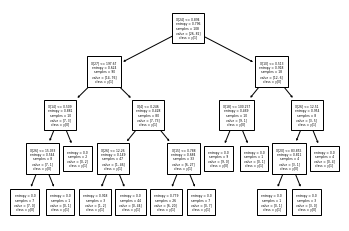

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import tree

f = open('holamundo.txt','w')
salida=""
"""
print("Depth\t","Acc\t","Prec\t","Recall\t","Sp\t","f1\t","AUC")
for i in range(100,1001,50):
    DTClassifier_clf = DecisionTreeClassifier(random_state=0,max_depth=i,splitter="random",criterion="gini")
    arbol=DTClassifier_clf.fit(X_train, y_train)
    #tree.plot_tree(arbol) 
    X_test = full_pipeline.transform(test_data)
    y_pred = DTClassifier_clf.predict(X_test) 
    y_test = test_data["TEP"]
    CM = confusion_matrix(y_test, y_pred)
    vp = CM.item(3)
    fp = CM.item(1)
    fn = CM.item(2)
    vn = CM.item(0) 
    accuracy = (vp+vn)/(vp+fn+fp+vn)
    precision = vp/(vp+fp)
    recall = vp/(vp+fn)
    specificity = (vn)/(vn+fp)
    f1_score = 2 * ((precision * recall)/(precision + recall))
    roc = roc_auc_score (y_test, y_pred)
    print(i,"\t","%.3f"%accuracy,"\t","%.3f"%precision,"\t","%.3f"%recall,"\t","%.3f"%specificity,"\t","%.3f"%f1_score,"\t","%.3f"%roc)
    salida = salida  + str(i) + str("\t%.3f"%accuracy) + str("\t%.3f"%precision) + str("\t%.3f"%recall) + str("\t%.3f"%specificity) + str("\t%.3f"%f1_score) + str("\t%.3f"%roc) + str("\n")
    
f.write(salida)
f.close()
"""
DTClassifier_clf = DecisionTreeClassifier(random_state=0,max_depth=4,splitter="random",criterion="entropy")
arbol=DTClassifier_clf.fit(X_train, y_train)
tree.plot_tree(decision_tree=arbol, fontsize=3,class_names=True) 
tree.export_graphviz(decision_tree=arbol, class_names=True,out_file="arbolito.dot")


# Entrenamiento con redes neuronales

In [66]:
from sklearn.neural_network import MLPClassifier


f = open('holaNN.txt','w')
salida=""

print("Capa1\t","Capa2\t","Acc\t","Prec\t","Recall\t","Sp\t","f1\t","AUC\t","VPP\t","VPN\t","LR+\t","LR-\t")


for i in range(1,16,1):
    for j in range(1,16,1):
    
        NN_clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(i,j), activation="relu",random_state=1)
        NN_clf.fit(X_train, y_train)
        X_test = full_pipeline.transform(test_data)
        y_pred = NN_clf.predict(X_test) #predecir con NN
        y_test = test_data["TEP"]
        CM = confusion_matrix(y_test, y_pred)
        vp = CM.item(3)
        fp = CM.item(1)
        fn = CM.item(2)
        vn = CM.item(0) 

        accuracy = (vp+vn)/(vp+fn+fp+vn)
    
        if (vp+fp==0):
            precision=0
        else:
            precision = vp/(vp+fp)
            
        recall = vp/(vp+fn)
        specificity = (vn)/(vn+fp)
     
        if precision + recall==0:
            f1_score=0
        else:
            f1_score = 2 * ((precision * recall)/(precision + recall))
     
        roc = roc_auc_score (y_test, y_pred)
        
        if (vp+fp==0):
            vpp=0
        else:
            vpp=vp/(vp+fp)
        
        if vn+fn==0:
            vpn=0
        else:
            vpn=vn/(vn+fn)
        
        if (1-specificity==0):
            lr1=20
        else:
            lr1=recall/(1-specificity)
        
        if specificity==0:
            lr2=20
        else:
            lr2=(1-recall)/specificity
        salida = salida  + str(i) + str("\t") + str(j) + str("\t%.3f"%accuracy) + str("\t%.3f"%precision) + str("\t%.3f"%recall) + str("\t%.3f"%specificity) + str("\t%.3f"%f1_score) + str("\t%.3f"%roc) + str("\t%.3f"%vpp) + str("\t%.3f"%vpn) + str("\t%.3f"%lr1) + str("\t%.3f"%lr2) + str("\n")
        print(i,"\t",j,"\t","%.3f"%accuracy,"\t","%.3f"%precision,"\t","%.3f"%recall,"\t","%.3f"%specificity,"\t","%.3f"%f1_score,"\t","%.3f"%roc,"\t","%.3f"%vpp,"\t","%.3f"%vpn,"\t","%.3f"%lr1,"\t","%.3f"%lr2)

    
        #print(i,"\t",j,"\t","%.3f"%accuracy,"\t","%.3f"%precision,"\t","%.3f"%recall,"\t","%.3f"%specificity,"\t","%.3f"%f1_score,"\t","%.3f"%roc)
        #salida = salida  + str(i) + str("\t") + str(j) + str("\t%.3f"%accuracy) + str("\t%.3f"%precision) + str("\t%.3f"%recall) + str("\t%.3f"%specificity) + str("\t%.3f"%f1_score) + str("\t%.3f"%roc) + str("\n")
f.write(salida)
f.close()


#NN_clf = MLPClassifier(solver='adam', hidden_layer_sizes=(4,3), activation="relu",random_state=1)
#NN_clf.fit(X_train, y_train)
       

Capa1	 Capa2	 Acc	 Prec	 Recall	 Sp	 f1	 AUC	 VPP	 VPN	 LR+	 LR-	
1 	 1 	 0.786 	 0.840 	 0.913 	 0.200 	 0.875 	 0.557 	 0.840 	 0.333 	 1.141 	 0.435
1 	 2 	 0.750 	 0.833 	 0.870 	 0.200 	 0.851 	 0.535 	 0.833 	 0.250 	 1.087 	 0.652
1 	 3 	 0.786 	 0.870 	 0.870 	 0.400 	 0.870 	 0.635 	 0.870 	 0.400 	 1.449 	 0.326
1 	 4 	 0.714 	 0.895 	 0.739 	 0.600 	 0.810 	 0.670 	 0.895 	 0.333 	 1.848 	 0.435
1 	 5 	 0.571 	 1.000 	 0.478 	 1.000 	 0.647 	 0.739 	 1.000 	 0.294 	 20.000 	 0.522
1 	 6 	 0.786 	 0.840 	 0.913 	 0.200 	 0.875 	 0.557 	 0.840 	 0.333 	 1.141 	 0.435
1 	 7 	 0.893 	 1.000 	 0.870 	 1.000 	 0.930 	 0.935 	 1.000 	 0.625 	 20.000 	 0.130
1 	 8 	 0.821 	 0.875 	 0.913 	 0.400 	 0.894 	 0.657 	 0.875 	 0.500 	 1.522 	 0.217
1 	 9 	 0.786 	 0.840 	 0.913 	 0.200 	 0.875 	 0.557 	 0.840 	 0.333 	 1.141 	 0.435
1 	 10 	 0.786 	 0.840 	 0.913 	 0.200 	 0.875 	 0.557 	 0.840 	 0.333 	 1.141 	 0.435
1 	 11 	 0.679 	 1.000 	 0.609 	 1.000 	 0.757 	 0.804 	 1.000 	 0.357 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 	 2 	 0.857 	 1.000 	 0.826 	 1.000 	 0.905 	 0.913 	 1.000 	 0.556 	 20.000 	 0.174
5 	 3 	 0.857 	 0.880 	 0.957 	 0.400 	 0.917 	 0.678 	 0.880 	 0.667 	 1.594 	 0.109
5 	 4 	 0.893 	 0.917 	 0.957 	 0.600 	 0.936 	 0.778 	 0.917 	 0.750 	 2.391 	 0.072
5 	 5 	 0.821 	 0.875 	 0.913 	 0.400 	 0.894 	 0.657 	 0.875 	 0.500 	 1.522 	 0.217
5 	 6 	 0.821 	 0.875 	 0.913 	 0.400 	 0.894 	 0.657 	 0.875 	 0.500 	 1.522 	 0.217
5 	 7 	 0.786 	 0.870 	 0.870 	 0.400 	 0.870 	 0.635 	 0.870 	 0.400 	 1.449 	 0.326
5 	 8 	 0.857 	 0.952 	 0.870 	 0.800 	 0.909 	 0.835 	 0.952 	 0.571 	 4.348 	 0.163
5 	 9 	 0.821 	 0.875 	 0.913 	 0.400 	 0.894 	 0.657 	 0.875 	 0.500 	 1.522 	 0.217
5 	 10 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
5 	 11 	 0.893 	 0.917 	 0.957 	 0.600 	 0.936 	 0.778 	 0.917 	 0.750 	 2.391 	 0.072
5 	 12 	 0.964 	 1.000 	 0.957 	 1.000 	 0.978 	 0.978 	 1.000 	 0.833 	 20.000 	 0.043
5 	 13 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


11 	 12 	 0.786 	 0.870 	 0.870 	 0.400 	 0.870 	 0.635 	 0.870 	 0.400 	 1.449 	 0.326
11 	 13 	 0.857 	 0.880 	 0.957 	 0.400 	 0.917 	 0.678 	 0.880 	 0.667 	 1.594 	 0.109
11 	 14 	 0.857 	 0.880 	 0.957 	 0.400 	 0.917 	 0.678 	 0.880 	 0.667 	 1.594 	 0.109
11 	 15 	 0.893 	 0.885 	 1.000 	 0.400 	 0.939 	 0.700 	 0.885 	 1.000 	 1.667 	 0.000
12 	 1 	 0.786 	 0.840 	 0.913 	 0.200 	 0.875 	 0.557 	 0.840 	 0.333 	 1.141 	 0.435
12 	 2 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
12 	 3 	 0.893 	 0.917 	 0.957 	 0.600 	 0.936 	 0.778 	 0.917 	 0.750 	 2.391 	 0.072
12 	 4 	 0.929 	 0.957 	 0.957 	 0.800 	 0.957 	 0.878 	 0.957 	 0.800 	 4.783 	 0.054
12 	 5 	 0.893 	 0.917 	 0.957 	 0.600 	 0.936 	 0.778 	 0.917 	 0.750 	 2.391 	 0.072
12 	 6 	 0.821 	 0.846 	 0.957 	 0.200 	 0.898 	 0.578 	 0.846 	 0.500 	 1.196 	 0.217
12 	 7 	 0.821 	 0.875 	 0.913 	 0.400 	 0.894 	 0.657 	 0.875 	 0.500 	 1.522 	 0.217
12 	 8 	 0.893 	 0.917 	 0.957 	 0.600 

Graficar los resultados

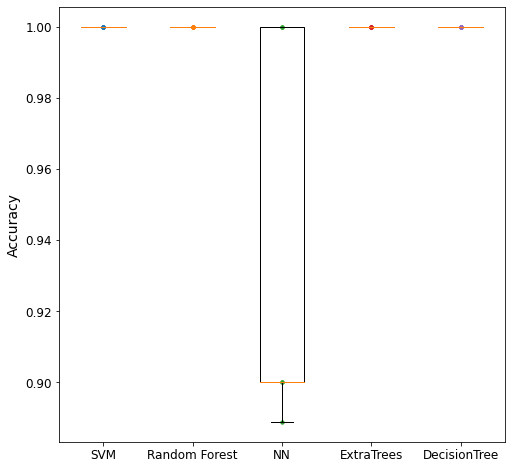

In [146]:
plt.figure(figsize=(8, 8))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, NN_scores, ".")
plt.plot([4]*10, ET_scores, ".")
plt.plot([5]*10, DT_scores, ".")
plt.boxplot([svm_scores, forest_scores,NN_scores,ET_scores,DT_scores], labels=("SVM","Random Forest","NN","ExtraTrees","DecisionTree"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

# Ahora se usa el conjunto de prueba. Todo lo anterior era sobre el mismo conjunto de entrenamiento

In [26]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.01869321e+00,  1.69051416e+00, -2.20326325e-01,
        -4.91303684e-01,  1.01869321e+00, -2.42535625e-01,
        -2.42535625e-01, -2.20326325e-01, -2.63262095e-01,
        -4.32218911e-01,  6.92424765e-01,  1.03774904e+00,
        -4.17028828e-01, -2.82842712e-01, -6.34505636e-01,
        -4.01609664e-01, -5.45450646e-01,  1.67902782e-01,
        -2.06792340e-01,  4.28364592e-02,  7.85658458e-01,
        -5.77350269e-01, -4.01609664e-01, -1.37360564e-01,
        -4.47213595e-01, -6.68843161e-01,  2.88564881e-02,
        -2.08844247e-02],
       [ 9.81649817e-01, -1.83699899e+00, -2.20326325e-01,
        -4.91303684e-01, -9.81649817e-01,  4.12310563e+00,
        -2.42535625e-01, -2.20326325e-01, -2.63262095e-01,
        -4.32218911e-01,  6.92424765e-01,  1.03774904e+00,
        -4.17028828e-01, -2.82842712e-01, -6.34505636e-01,
        -4.01609664e-01, -2.56682657e-01,  4.56537885e-01,
         2.10657617e-01,  8.63638290e-01,  2.09153055e-01,
         1.73205081e+00, -4.01

In [27]:
y_pred = svm_clf.predict(X_test)  #predecir con SVM
#y_pred = forest_clf.predict(X_test) #predecir con RF
#y_pred = NN_clf.predict(X_test) #predecir con NN
#y_pred = ExtraTrees_clf.predict(X_test) #predecir con NN
#y_pred = DTClassifier_clf.predict(X_test) #predecir con NN
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1])

In [28]:
y_test = test_data["TEP"]
y_test

73     1
45     1
60     1
42     1
128    0
62     1
12     1
81     1
19     1
64     1
44     1
51     1
26     1
36     1
31     1
40     1
132    1
105    0
4      1
112    0
120    0
126    0
27     1
16     1
18     1
10     1
66     1
69     1
Name: TEP, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9285714285714286

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 4,  1],
       [ 1, 22]])

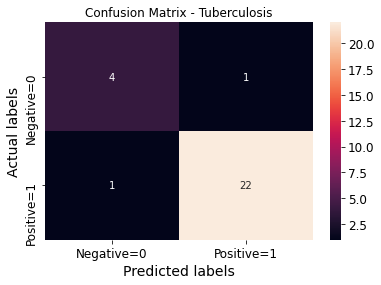

In [31]:
%matplotlib inline

ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Tuberculosis') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();